## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [131]:
# Installing the libraries with the specified version.
!pip3 install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 112, in get_requires_for_build_wheel
          backend = _build_backend()
                    ^^^^^^^^^^^^^^^^
        File "/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 77, in _build_backend
          obj = impo

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [132]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # Example for classifier


## Loading the dataset

In [133]:
data = pd.read_csv('Loan_Modelling.csv');
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Overview

* Observations
* Sanity checks

In [134]:
df = data.copy()
print(f"shape of data: {data.shape}")
print(f"{data.info()}")
print(f"data description:{data.describe().T}" )
if(data.isnull().sum().sum() == 0):
    print(f"There are no null values in the provide data" )
else:
    print(f"There are {data.isnull().sum().sum()} null value in data")


shape of data: (5000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
data description:        

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

*** What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution? ***
a. There are 3462 customers that have no mortgage or the mortgage at 0 leading most of the data to be present at the first quartile
b. There are about 299 outliers in mortgage out of 5000 rows leading to approximately 5.98% of outliers in overall data
c. Mortgage is right skewed


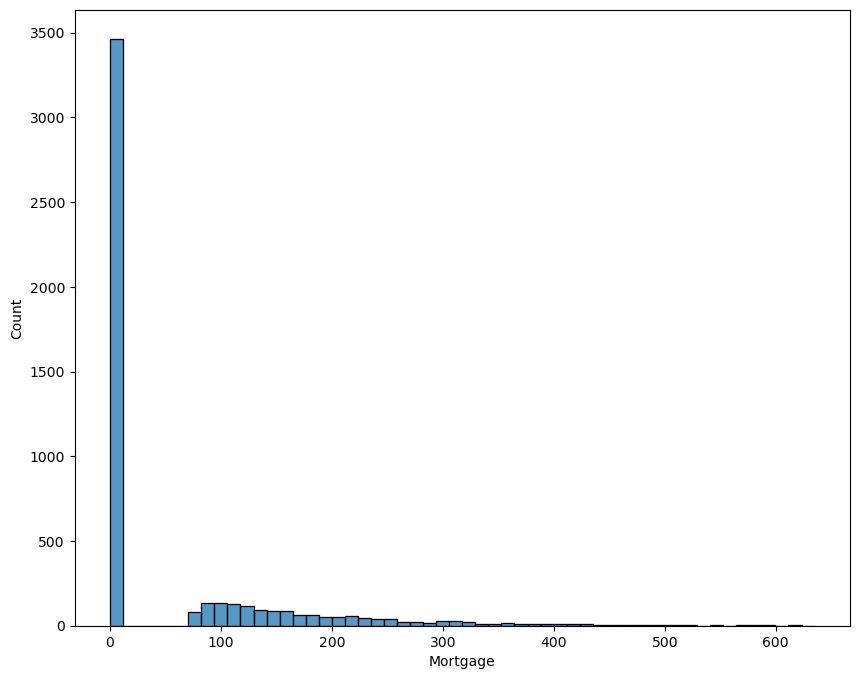

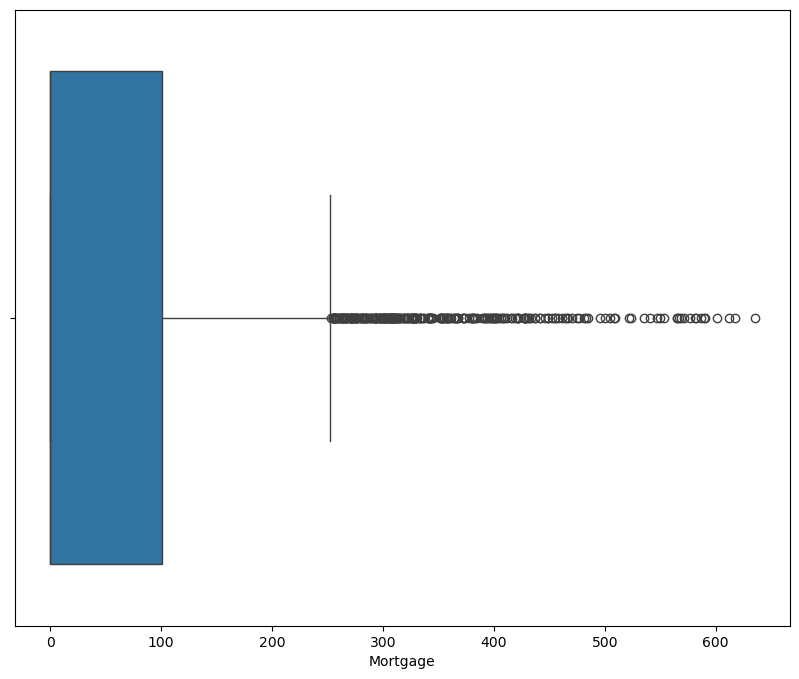

In [135]:
#1
print(f"*** What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution? ***")
mortgage_dist = df['Mortgage']
plt.figure(figsize=(10,8))
sns.histplot(data=df, x=mortgage_dist)
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x=mortgage_dist)
mortgage_dist_atzero = mortgage_dist[mortgage_dist == 0]
print(f"a. There are {mortgage_dist_atzero.shape[0]} customers that have no mortgage or the mortgage at 0 leading most of the data to be present at the first quartile")
mortgage_dist_outliers = mortgage_dist[mortgage_dist > 250]
print(f"b. There are about {mortgage_dist_outliers.shape[0]} outliers in mortgage out of {mortgage_dist.shape[0]} rows leading to approximately {(mortgage_dist_outliers.shape[0]/mortgage_dist.shape[0]) * 100:.2f}% of outliers in overall data")
print(f"c. Mortgage is right skewed")

In [136]:
#2
customers = df['ID'].unique().shape[0]
customers
print(f"*** How many customers have credit cards? ***")
print(f"a. All the {df.shape[0]} customers are unique")
customers_with_cc = df[df['CreditCard'] == 1].shape[0]
print(f"b. There are {customers_with_cc} customer with credit card")


*** How many customers have credit cards? ***
a. All the 5000 customers are unique
b. There are 1470 customer with credit card


***What are the attributes that have a strong correlation with the target attribute (personal loan)?***
a. Personal_Loan have strong positive co-relation with Income, CCAvg and CD_Account at 0.50,0.37 and 0.32 respectively


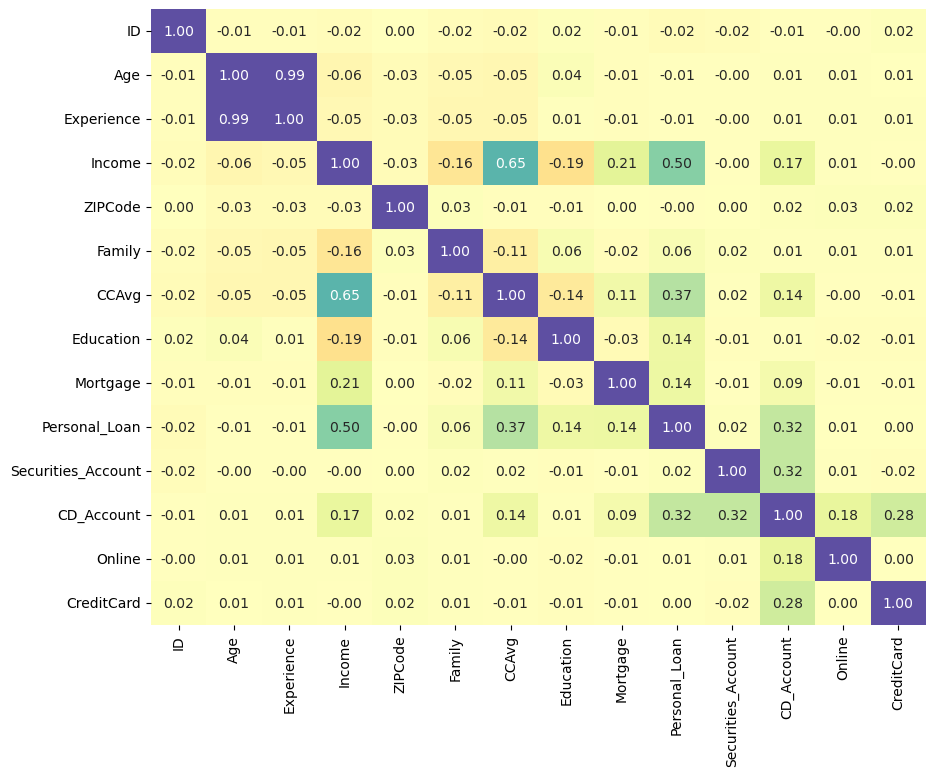

In [137]:
#3
print(f"***What are the attributes that have a strong correlation with the target attribute (personal loan)?***")
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(),cbar=False,fmt='.2f',cmap='Spectral',vmin=-1,vmax=1,annot=True)
print(f"a. Personal_Loan have strong positive co-relation with Income, CCAvg and CD_Account at {df['Personal_Loan'].corr(df['Income']):.2f},{df['Personal_Loan'].corr(df['CCAvg']):.2f} and {df['Personal_Loan'].corr(df['CD_Account']):.2f} respectively")


***How does a customer's interest in purchasing a loan vary with their age?***
a. From the heatmap we could already say that age and personal loan doesn't exhibit a great corelation
b. Customers at all ages have interest in buying personal loans


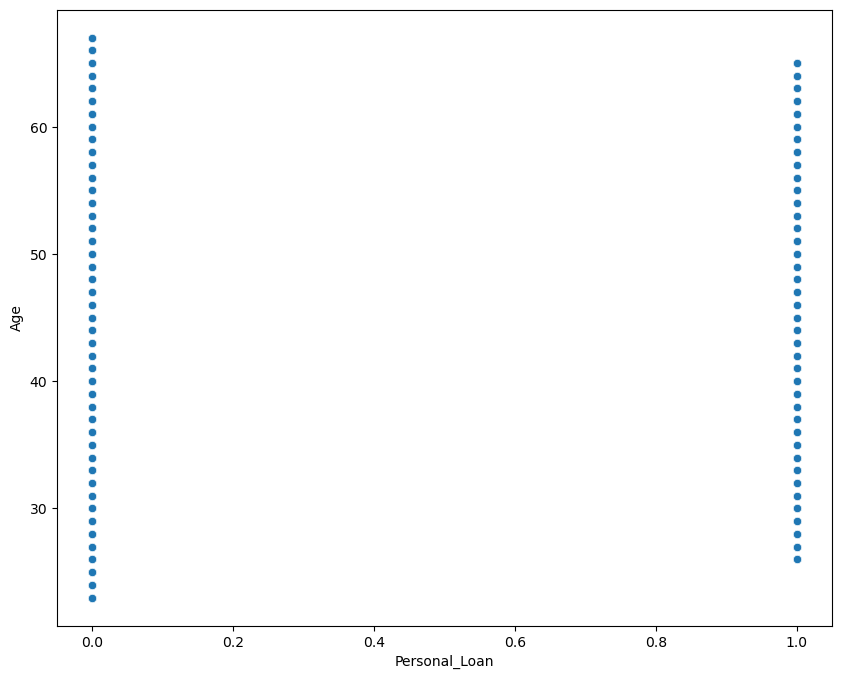

In [138]:
#4
print(f"***How does a customer's interest in purchasing a loan vary with their age?***")
print(f"a. From the heatmap we could already say that age and personal loan doesn't exhibit a great corelation")
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['Personal_Loan'],y=df['Age'])
print("b. Customers at all ages have interest in buying personal loans")

In [139]:

#5
print(f"***How does a customer's interest in purchasing a loan vary with their education?***")
print(f"a. Education vs Personal loan")
for i in range(1,4):
    print(f"{i}. Education with value {i}: {(df[(df['Education'] == i) & (df['Personal_Loan'] == 1)]).shape[0]} of {df[df['Education'] == i].shape[0]} have accepted personal loan")
print(f"b. Customers who have Advanced/Professional education are higher probable of accepting the personal loan")

***How does a customer's interest in purchasing a loan vary with their education?***
a. Education vs Personal loan
1. Education with value 1: 93 of 2096 have accepted personal loan
2. Education with value 2: 182 of 1403 have accepted personal loan
3. Education with value 3: 205 of 1501 have accepted personal loan
b. Customers who have Advanced/Professional education are higher probable of accepting the personal loan


***How does a customer's interest in purchasing a loan vary with their Income?***
a. The lowest income where the customer accepted the loan is 60k which indicates that customers with income less than 60k have no interest in accepting personal loans
b. Average income of the customer who accepted personal loan is 144.75k


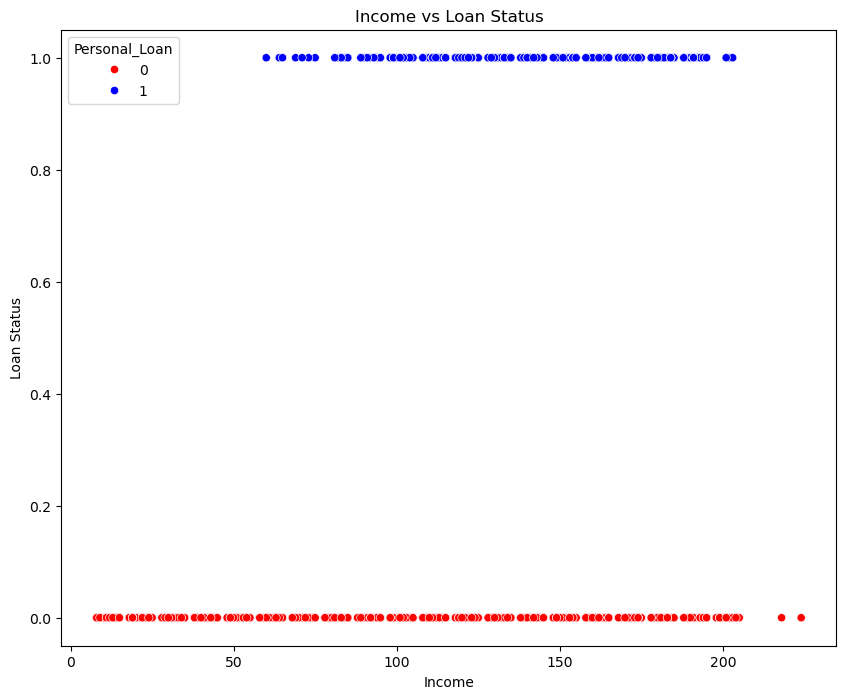

In [140]:
#6
print(f"***How does a customer's interest in purchasing a loan vary with their Income?***")
pl_vs_income = df[df['Personal_Loan'] == 1]
print(f"a. The lowest income where the customer accepted the loan is {pl_vs_income['Income'].min()}k which indicates that customers with income less than 60k have no interest in accepting personal loans")
print(f"b. Average income of the customer who accepted personal loan is {pl_vs_income['Income'].describe().T['mean']:.2f}k")
# Scatter Plot using Seaborn
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Income', y='Personal_Loan', hue='Personal_Loan', palette={1: 'blue', 0: 'red'})

# Labels and Title
plt.xlabel('Income')
plt.ylabel('Loan Status')
plt.title('Income vs Loan Status')
plt.show()

***How does a customer's interest in purchasing a loan vary with their CCAvg?***
b. Customers who accepted personal loan have an average credit card amount of 3.91k


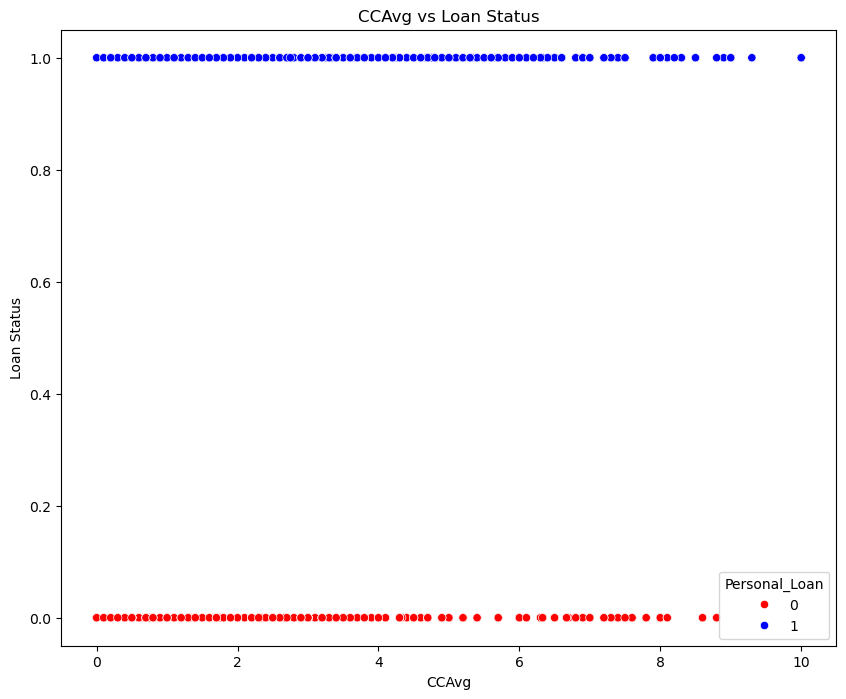

In [141]:
#7
print(f"***How does a customer's interest in purchasing a loan vary with their CCAvg?***")
pl_vs_ccavg = df[df['Personal_Loan'] == 1]
print(f"b. Customers who accepted personal loan have an average credit card amount of {pl_vs_ccavg['CCAvg'].describe().T['mean']:.2f}k")
# Scatter Plot using Seaborn
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='CCAvg', y='Personal_Loan', hue='Personal_Loan', palette={1: 'blue', 0: 'red'})

# Labels and Title
plt.xlabel('CCAvg')
plt.ylabel('Loan Status')
plt.title('CCAvg vs Loan Status')
plt.show()

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [142]:
#Missing value treatment
print(f"There are {df.isnull().sum().sum()} null values in the provided data")
print(f"{df.nunique()}")
#dropping ID column as there there are 5000 unique values with in 5000 rows
df = df.drop(columns=['ID'])

There are 0 null values in the provided data
ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64


In [143]:
#Feature engineering
#checking if zipcode or area customers live in affecting the acceptance of loan due to other parameters outside the provided data
print(f"{df['ZIPCode'].nunique()}")
#corelation between zipcode and personal loan
print(f"correaltion between personal loan and ZIPCode{df['Personal_Loan'].corr(df['ZIPCode']):.2f}")
#Dropping the column zipcode as the corelation is too low for this feature to be considered
df = df.drop(columns=['ZIPCode'])

467
correaltion between personal loan and ZIPCode-0.00


In [144]:
#Column Expereince have high corelation with Age which directly related to the redundancy, dropping the column experience as well
df = df.drop(columns=['Experience'])

In [145]:
#Data prepeation for model

# Define features (X) and target (y)
X = df.drop(columns=['Personal_Loan'])  # Drop the target column
y = df['Personal_Loan']                 # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4000, 10)
X_test shape: (1000, 10)
y_train shape: (4000,)
y_test shape: (1000,)


## Model Building

### Model Evaluation Criterion

*


### Model Building

In [146]:
#checking existing feature rankings for further fine tuning.
model = RandomForestClassifier()
model.fit(X, y)
feature_importances = model.feature_importances_

#DataFrame to display features with their importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sorting by importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Display least important features
print(importance_df)




              Feature  Importance
6  Securities_Account    0.004123
8              Online    0.007765
9          CreditCard    0.007974
5            Mortgage    0.033748
0                 Age    0.044986
7          CD_Account    0.049990
2              Family    0.126941
3               CCAvg    0.178220
4           Education    0.207987
1              Income    0.338266


## Model Performance Improvement

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___